In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

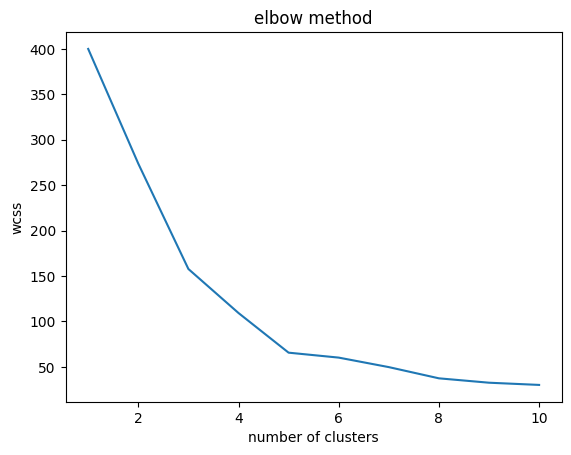

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.title('elbow method')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

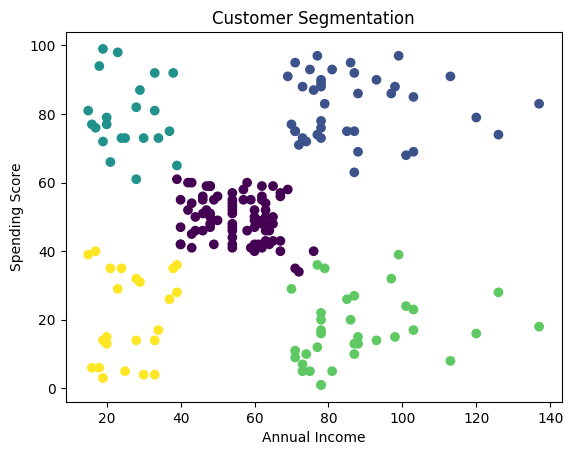

In [12]:
plt.scatter(
    data['Annual Income (k$)'],
    data['Spending Score (1-100)'],
    c=data['Cluster']
)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation")
plt.show()